In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re
import string

In [24]:
#Get the news file
news = pd.read_excel("news.xlsx")
news.head()

,id,title,text,label
0,2,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
1,3,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
2,5,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
3,6,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.\n\nCar...,REAL
4,7,Obama Argues Against Goverment Shutdown Over P...,President Barack ObamaÂ saidÂ Saturday night t...,REAL


In [25]:
#Create a numerical truth class with 2 categories
truth_class = []
for row in news['label']:
    if row == "REAL":
        truth_class.append(1)
    else:           
        truth_class.append(0)
news["truth_class"] = truth_class
news = news.sample(frac=1)
news.head()

,id,title,text,label,truth_class
1108,1844,Clinton clearing primary field for potential 2...,Hillary Clinton appears to have scared away mu...,REAL,1
3195,5342,Die Hard 3 Predicts Hillary Clinton To be Pres...,Hollyjood strikes again ! Quoting: Buck Bundy ...,FAKE,0
5013,8396,Lawyer Who Kept Hillary Campaign Chief Out of ...,Lawyer Who Kept Hillary Campaign Chief Out of ...,FAKE,0
4752,7964,Flashback: Clinton cheered 11th-hour indictmen...,Print \nWhispers of â€œpaybackâ€ are being di...,FAKE,0
137,231,Why is Paul Ryan miffed about new budget deal?,The budget deal was crafted by outgoing Speake...,REAL,1


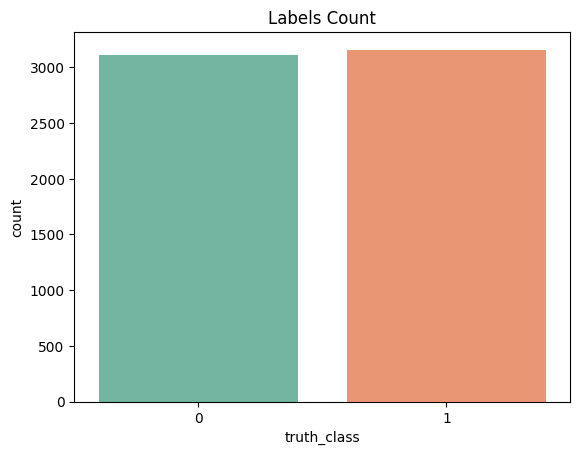

In [26]:
#Plot the truth class count 
sns.countplot(x=news.truth_class,data=news,palette='Set2').set(title="Labels Count");

In [27]:
news.reset_index(inplace= True)
news.head()

,index,id,title,text,label,truth_class
0,1108,1844,Clinton clearing primary field for potential 2...,Hillary Clinton appears to have scared away mu...,REAL,1
1,3195,5342,Die Hard 3 Predicts Hillary Clinton To be Pres...,Hollyjood strikes again ! Quoting: Buck Bundy ...,FAKE,0
2,5013,8396,Lawyer Who Kept Hillary Campaign Chief Out of ...,Lawyer Who Kept Hillary Campaign Chief Out of ...,FAKE,0
3,4752,7964,Flashback: Clinton cheered 11th-hour indictmen...,Print \nWhispers of â€œpaybackâ€ are being di...,FAKE,0
4,137,231,Why is Paul Ryan miffed about new budget deal?,The budget deal was crafted by outgoing Speake...,REAL,1


In [28]:
#Remove all unnecessary columns
news.drop(columns=['index','id','title','label'],inplace=True)
news.head()

,text,truth_class
0,Hillary Clinton appears to have scared away mu...,1
1,Hollyjood strikes again ! Quoting: Buck Bundy ...,0
2,Lawyer Who Kept Hillary Campaign Chief Out of ...,0
3,Print \nWhispers of â€œpaybackâ€ are being di...,0
4,The budget deal was crafted by outgoing Speake...,1


In [29]:
#Clean the text strings from useless/ineligible characters
def text_clean(text):
    text = text.lower()
    text = text.strip()
    text = text.capitalize()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('<.*?>+', '', text)
    text = re.sub("(http\S+)", "", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('(\n+)', '', text)
    text = re.sub("([\w\.\-\_]+@[\w\.\-\_]+)", "", text)
    return text
news["text"] = news["text"].apply(text_clean)
news.head()

,text,truth_class
0,Hillary clinton appears to have scared away mu...,1
1,Hollyjood strikes again quoting buck bundy ...,0
2,Lawyer who kept hillary campaign chief out of ...,0
3,Print whispers of â œpaybackâ are being dir...,0
4,The budget deal was crafted by outgoing speake...,1


In [30]:
#Assign the target variable and the independent variable
x = news["text"]
y = news["truth_class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
#Use the vectorizer to turn the String Texts into vectors
Vectorizer = TfidfVectorizer()
Vect_x_Train = Vectorizer.fit_transform(x_train)
Vect_x_Test = Vectorizer.transform(x_test)

In [32]:
#Use the Logistic Regression for the model
L_Reg = LogisticRegression()
L_Reg.fit(Vect_x_Train,y_train)
L_Reg_Pred = L_Reg.predict(Vect_x_Test)

In [33]:
#Show the Classification report
print(classification_report(y_test, L_Reg_Pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       644
           1       0.93      0.91      0.92       611

    accuracy                           0.92      1255
   macro avg       0.92      0.92      0.92      1255
weighted avg       0.92      0.92      0.92      1255



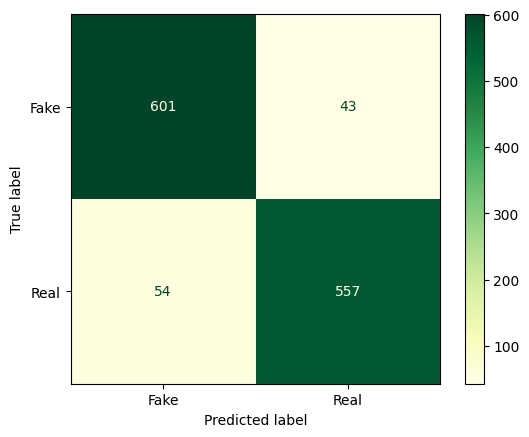

In [34]:
#Visualize the Confusion Matrix
cm_display = ConfusionMatrixDisplay.from_estimator(L_Reg,Vect_x_Test,y_test, display_labels= ['Fake', 'Real'],cmap="YlGn");